In [2]:
! pip install -q -U langgraph langchain_core langchain-google-genai

In [8]:
from langchain_core.messages import HumanMessage,AIMessage,SystemMessage

messages = [HumanMessage(content="Hi!",name="Shahmir")]
messages.append(AIMessage(content="Hey! How can I help you !",name="Model"))
messages.append(HumanMessage(content="Tell me the name of the capital of Pakistan ?", name="Shahmir"))
messages.append(AIMessage(content="The capital of Pakistan is Islamabad !",name="Model"))

for m in messages:
    m.pretty_print()

================================ Human Message =================================
Name: Shahmir

Hi!
================================== Ai Message ==================================
Name: Model

Hey! How can I help you !
================================ Human Message =================================
Name: Shahmir

Tell me the name of the capital of Pakistan ?
================================== Ai Message ==================================
Name: Model

The capital of Pakistan is Islamabad !


In [6]:
from langchain_google_genai import ChatGoogleGenerativeAI
import os
from dotenv import load_dotenv

load_dotenv()

api_key = os.getenv("GEMINI_API_KEY")

llm : ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(model="gemini-1.5-flash", api_key=api_key)

llm.invoke("Hi!")


AIMessage(content='Hi there! How can I help you today? \n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-1aa056ad-d9d3-4e50-8bb6-e5faa9eca31c-0', usage_metadata={'input_tokens': 3, 'output_tokens': 11, 'total_tokens': 14})

In [7]:
result = llm.invoke("What is your name")
print(result)

content="I don't have a name. I am a large language model, and I am not a person. I am a computer program that can generate text, translate languages, write different kinds of creative content, and answer your questions in an informative way. \n\nIs there anything else I can help you with today? \n" additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]} id='run-b7cd8a1a-334f-4c86-bb9c-670fa4cc9ce7-0' usage_metadata={'input_tokens': 5, 'output_tokens': 64, 'total_tokens': 69}


In [10]:
systems_human_message = [
    SystemMessage(content="You are a helper and your name is Bob"),
    HumanMessage(content="What is your name ?")
]

llm.invoke(systems_human_message)

AIMessage(content='Hi there! My name is Bob. 😊  How can I help you today? \n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-d1b9a575-50e6-46b5-86c6-75473930ea00-0', usage_metadata={'input_tokens': 15, 'output_tokens': 17, 'total_tokens': 32})

## Tools

In [11]:
def deposit_money(name:str,bank_no:int):
    """
    Deposit Money in the bank account
    
    Args:
    name: first str
    bank_no: second int 
    """
    return {"Status": "Sccessfully deposit money in the account"}

In [12]:
content = [HumanMessage(content="Deposit money in Ahmeds account .His account number is 817663")]
llm.invoke(content)

AIMessage(content='I understand you want to deposit money into Ahmed\'s account, but I am just a language model. I can\'t directly interact with real-world systems like bank accounts. \n\nTo deposit money into Ahmed\'s account, you\'ll need to:\n\n* **Know the specific bank and branch:**  Is it a local bank, an online bank, or a specific branch? \n* **Have the correct account type:** Is it a checking account, savings account, or something else?\n* **Have access to a deposit method:** This could be online banking, a mobile app, a physical bank branch, or an ATM.\n\n**Here are some ways to deposit money into an account:**\n\n* **Online Banking:**  Log in to your online banking account, find the "transfer" or "deposit" option, and enter Ahmed\'s account information.\n* **Mobile App:** Use your bank\'s mobile app to initiate a transfer or deposit.\n* **Physical Bank Branch:** Visit a branch of the bank where Ahmed\'s account is held and deposit cash or a check.\n* **ATM:**  Some ATMs allow

In [20]:
tools = [deposit_money]

llm_with_tool = llm.bind_tools(tools)

llm_with_tool.invoke(content).pretty_print()


Key 'title' is not supported in schema, ignoring
Key 'title' is not supported in schema, ignoring
Key 'title' is not supported in schema, ignoring


{'name': 'deposit_money', 'description': 'Deposit Money in the bank account\n\nArgs:\nname: first str\nbank_no: second int', 'parameters': {'type_': 6, 'description': 'Deposit Money in the bank account\n\nArgs:\nname: first str\nbank_no: second int ', 'properties': {'bank_no': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}, 'name': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['name', 'bank_no'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
================================== Ai Message ==================================
Tool Calls:
  deposit_money (d881b15d-bc92-45d0-8464-92e05dd1ae59)
 Call ID: d881b15d-bc92-45d0-8464-92e05dd1ae59
  Args:
    bank_no: 817663.0
    name: Ahmed


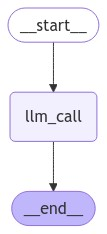

In [31]:
from typing_extensions import TypedDict
from langgraph.graph.state import START,END,CompiledStateGraph,StateGraph
from IPython.display import display,Image

class LlmWithToolState(TypedDict):
    messages: list


def llm_call(state:LlmWithToolState):
    messages = state['messages']
    call_response = llm_with_tool.invoke(messages)
    
    return {"messages":[call_response]}

workflow : StateGraph = StateGraph(LlmWithToolState)

workflow.add_node("llm_call",llm_call)

workflow.add_edge(START,"llm_call")
workflow.add_edge("llm_call",END)

graph:CompiledStateGraph = workflow.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [32]:
graph.invoke({"messages" : [HumanMessage(content="Hello How are you doing !")]})

{'name': 'deposit_money', 'description': 'Deposit Money in the bank account\n\nArgs:\nname: first str\nbank_no: second int', 'parameters': {'type_': 6, 'description': 'Deposit Money in the bank account\n\nArgs:\nname: first str\nbank_no: second int ', 'properties': {'bank_no': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}, 'name': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['name', 'bank_no'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}


{'messages': [AIMessage(content="I am an AI language model, so I don't have feelings. But I am here to assist you. How can I help you today? \n", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-4181e017-2125-42dc-9e9f-521a5f0b52eb-0', usage_metadata={'input_tokens': 75, 'output_tokens': 30, 'total_tokens': 105})]}